In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [24]:
df = pd.read_csv(r"train_data.csv")
df.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
0,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
1,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.050000
2,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
3,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.000000
4,MOBIL,CASUAL,0,2022-10-10,2022-10-10,0.033333


In [26]:
data = df
# Pisahkan fitur dan label
X = data[['Vehicle Type', 'Parking Slip Type', 'Duration']]
y = data['Total Income']
print(len(data))

43448


In [27]:
# Encode kolom kategorikal menggunakan LabelEncoder
label_encoder_vehicle = LabelEncoder()
X['Vehicle Type'] = label_encoder_vehicle.fit_transform(X['Vehicle Type'])

label_encoder_parking = LabelEncoder()
X['Parking Slip Type'] = label_encoder_parking.fit_transform(X['Parking Slip Type'])

# Normalisasi fitur numerik
scaler = StandardScaler()
X['Duration'] = scaler.fit_transform(X[['Duration']])

# Bagi data menjadi data pelatihan, data validasi, dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\khoir\AppData\Local\Temp\ipykernel_7756\39835619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vehicle Type'] = label_encoder_vehicle.fit_transform(X['Vehicle Type'])
C:\Users\khoir\AppData\Local\Temp\ipykernel_7756\39835619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Parking Slip Type'] = label_encoder_parking.fit_transform(X['Parking Slip Type'])
C:\Users\khoir\AppData\Local\Temp\ipykernel_7756\39835619.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [28]:
joblib.dump(label_encoder_vehicle, 'label_encoder_VH1.pkl')
joblib.dump(label_encoder_parking, 'label_encoder_PK1.pkl')

joblib.dump(scaler, 'scaler_Dur-park1.pkl')

['scaler_Dur-park1.pkl']

In [29]:
# Membuat model Neural Network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    
    keras.layers.Dense(1)  # Output layer
])


In [30]:
# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Melatih model pada data pelatihan dengan data validasi
history = model.fit(X_train, y_train, epochs=50, batch_size=24, verbose=1, validation_data=(X_test, y_test))

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

Epoch 1/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19507558.0000 - val_loss: 10054240.0000
Epoch 2/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19552246.0000 - val_loss: 10055261.0000
Epoch 3/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19315838.0000 - val_loss: 10057768.0000
Epoch 4/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19396826.0000 - val_loss: 9963718.0000
Epoch 5/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19363576.0000 - val_loss: 10250991.0000
Epoch 6/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19310262.0000 - val_loss: 10411512.0000
Epoch 7/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19368096.0000 - val_loss: 10056310.0000
Epoch 8/50
1449/1449 [==============================] - 3s 2ms/step - loss: 19514542.0000 - val_loss: 10888937.0000
Epoch 9/50
1449/1449 [==============================] - 3s 2ms/step - los

In [11]:
print(history.history.keys())


dict_keys(['loss', 'val_loss'])


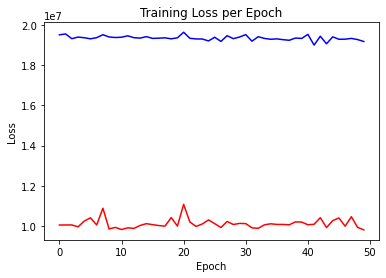

In [33]:
import matplotlib.pyplot as plt

# Mendapatkan data loss dan epoch dari objek history
loss = history.history['loss']
valos = history.history['val_loss']

epoch = history.epoch

# Memplot loss per epoch
plt.plot(epoch, loss, 'b-')
plt.plot(epoch, valos, 'r-')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.show()

In [34]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 9810144.20490475
MAE: 1043.9503592997069
R-squared: 0.9249483668078543


In [14]:
model.save('model-parkir1b.h5')

In [18]:
df_hist = pd.DataFrame(history.history)
df_hist.to_csv('history-model-parkir1b.csv', index=False)

In [35]:
# Misalnya, data baru dalam bentuk DataFrame 'new_data'
new_data = pd.DataFrame({
    'Vehicle Type': ['MOTOR'],  # Sesuaikan dengan kategori yang sesuai
    'Parking Slip Type': ['CASUAL'],  # Sesuaikan dengan kategori yang sesuai
    'Duration': [4.5]
})

# Encode kolom kategorikal menggunakan LabelEncoder yang sama dengan data pelatihan
new_data['Vehicle Type'] = label_encoder_vehicle.transform(new_data['Vehicle Type'])
new_data['Parking Slip Type'] = label_encoder_parking.transform(new_data['Parking Slip Type'])

# Normalisasi fitur numerik jika diperlukan
new_data['Duration'] = scaler.transform(new_data[['Duration']])

# Prediksi Total Income untuk data baru
predicted_income = model.predict(new_data)
print(f'Prediksi Total Income untuk data baru: {predicted_income[0][0]}')


1/1 [==============================] - 0s 37ms/step
Prediksi Total Income untuk data baru: 9918.8486328125
